In [1]:
from tensor import *
from module import *
from keras.datasets import mnist
import keras
import numpy as np

2023-05-24 20:16:32.347967: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 20:16:32.391127: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 20:16:32.391970: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 20:16:33.366074: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
train_images = np.asarray(x_train, dtype=np.float32) / 255.0
test_images = np.asarray(x_test, dtype=np.float32) / 255.0
train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)
y_train = keras.utils.to_categorical(y_train)

In [3]:
def compute_loss(outputs, labels):
    # Avoid numerical instability by adding a small epsilon value
    epsilon = 1e-10

    # Apply softmax to convert logits into probabilities
    softmax_outputs = np.exp(outputs) / np.sum(np.exp(outputs), axis=1, keepdims=True)

    # Calculate the cross-entropy loss
    loss = -np.sum(labels * np.log(softmax_outputs + epsilon)) / outputs.shape[0]
    return loss

def compute_loss(outputs, labels):
    epsilon = 1e-10
    log_probs =  (outputs.softmax()  + epsilon ).log()
    return -(labels*log_probs).sum(axis = 1).sum() / outputs.shape[0]

def accuracy(outputs, labels):
	batch_size = labels.shape[0]
	acc = np.sum(np.argmax(outputs.data,axis=1) == np.argmax(labels.data,axis=1))/batch_size
	return acc

In [4]:

model = Sequential(Linear(784, 20),ReLU(), Linear(20,10))	
optimizer = SGD(model.parameters(), lr = 0.1, momentum= 0.1)

In [7]:
batch_size = 32
steps = 2000
Wb = Tensor(np.random.randn(784,10))# new initialized weights for gradient descent
l,a = 0, 0
for step in range(steps):
  
  optimizer.zero_grad()
  ri = np.random.permutation(train_images.shape[0])[:batch_size]
  Xb, yb = Tensor(train_images[ri], label="layer1 input"), Tensor(y_train[ri])
  y_predW = model(Xb)

  loss = compute_loss(y_predW,yb)
  loss.backward()
  a += accuracy(y_predW,yb)
  l += loss.data

  if step%100==99:
    print(f'step {step} loss {l/100} acc {a/100}')
    l,a = 0,0
  optimizer.step()


step 99 loss 2.05126314263371 acc 0.333125
step 199 loss 0.8057545436470716 acc 0.7696875
step 299 loss 0.5197506399982016 acc 0.84875
step 399 loss 0.42374553094101414 acc 0.8796875
step 499 loss 0.41140546429924635 acc 0.8859375
step 599 loss 0.37803383444868077 acc 0.8953125
step 699 loss 0.37264479341938417 acc 0.8878125
step 799 loss 0.3211472008711571 acc 0.9059375
step 899 loss 0.34812182280291865 acc 0.901875
step 999 loss 0.30878808878347064 acc 0.909375
step 1099 loss 0.2824500870336617 acc 0.9140625
step 1199 loss 0.2929355438903586 acc 0.9165625
step 1299 loss 0.2935344257167237 acc 0.91625
step 1399 loss 0.29092477072064665 acc 0.9125
step 1499 loss 0.2655459111085878 acc 0.92
step 1599 loss 0.26490524005160476 acc 0.921875
step 1699 loss 0.25210716078968176 acc 0.9234375
step 1799 loss 0.2688172295653456 acc 0.9215625
step 1899 loss 0.23146359368627295 acc 0.9334375
step 1999 loss 0.24624160444640344 acc 0.931875


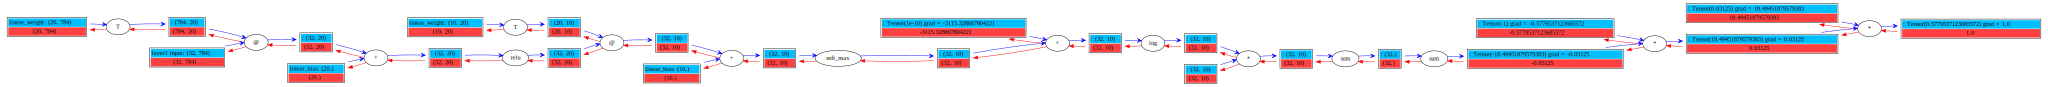

In [9]:
loss.visualize()

In [7]:
loss

Tensor(0.15175074615509573) grad = 1.0